# Análisis explotario del dataset TRAIN

### Limpieza de la base

In [1]:
# Comenzamos importando las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Almacenamos los datos del dataset TRAIN en un dataframe.
df = pd.read_csv('UH_2023_TRAIN.txt', delimiter='|')
# Visualizamos las primeras instancias.
df.head()

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660,26,2,0,1,0.0,22215.0
1,14,84318,515,4,660,26,2,0,1,0.0,22215.0
2,14,85579,340,4,520,32,2,0,1,0.0,20978.0
3,14,69671,340,4,520,32,2,0,1,0.0,40722.0
4,14,14001,852,14,NaN,81,1,0,1,0.0,14126.0


In [3]:
# Vemos la dimensión del conjunto de datos.
df.shape

(9601, 11)

In [4]:
# Obtenemos información sobre la base de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CAMPAÑA      9601 non-null   int64  
 1   ID_FINCA     9601 non-null   int64  
 2   ID_ZONA      9601 non-null   int64  
 3   ID_ESTACION  9601 non-null   int64  
 4   ALTITUD      9547 non-null   object 
 5   VARIEDAD     9601 non-null   int64  
 6   MODO         9601 non-null   int64  
 7   TIPO         9601 non-null   int64  
 8   COLOR        9601 non-null   int64  
 9   SUPERFICIE   9601 non-null   float64
 10  PRODUCCION   8526 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 825.2+ KB


In [5]:
# Vemos que la variable 'ALTITUD' es de tipo "object". En efecto, existen entradas en las que no nos
# dan una altura fija, sino que nos dicen que la altura está comprendida entre un rango de valores. 
# Una estrategia sería sustituir las entradas tipo rango de valores por la media entre los extremos
# de dicho intervalo.

In [6]:
# Comprobamos que todos las entradas de la variable altitud son float o str.
altitudes = np.array(df["ALTITUD"].values)
tipos = np.vectorize(lambda x: isinstance(x, (float, str)))(altitudes)

print(f"Número de entradas que no son de tipo float o str: {len(tipos) - np.count_nonzero(tipos)}")

Número de entradas que no son de tipo float o str: 0


In [7]:
# Comprobamos que las entradas tipo float son datos nulos y que las entradas tipo str tienen len=3
# o len=7.
lista = [x for x in altitudes if isinstance(x, float) or len(str(x)) not in [3, 7]]
lista

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [8]:
# Por tanto:
# Nótese que aquellos str que se podrian leer como enteros (por ejemplo podriamos leer '660' 
# como 660.0) tienen longitud 3.
print(altitudes[0])
print(len(altitudes[0]))
# Los nulos son de tipo float.
print(altitudes[4])
print(type(altitudes[4]))
# Aquellos que han sido introducidos como un rango de valores, tienen longitud mayor que 3, en 
# particular, longitud 7.
print(altitudes[12])
print(len(altitudes[12]))
# Nótese que:
print(altitudes[12][0:3])
print(altitudes[12][4:7])

660
3
nan
<class 'float'>
650-660
7
650
660


In [9]:
# Por tanto, una manera de imputar un valor numérico a las alturas que vienen dadas en intervalos
# es asignar la media del intervalo:
altitudes = df["ALTITUD"].to_numpy()
valores_altitud = np.zeros_like(altitudes, dtype=np.float64)

for i in range(len(altitudes)):
    if isinstance(altitudes[i], float):
        valores_altitud[i] = altitudes[i]
    elif len(altitudes[i]) > 3:
        valores_altitud[i] = (float(altitudes[i][:3]) + float(altitudes[i][4:7])) / 2
    else:
        valores_altitud[i] = float(altitudes[i])

df["ALTITUD"] = valores_altitud

In [10]:
# Comprobamos que ha funcionado. Teniamos que, la entrada 12 de la variable altitud en el dataset
# original era 650-660 y ahora:
print(altitudes[12])
print(df.ALTITUD[12])

650-660
655.0


In [11]:
df.info()
# Vemos que ahora todos los valores de la variable altitud son de tipo float como queríamos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601 entries, 0 to 9600
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CAMPAÑA      9601 non-null   int64  
 1   ID_FINCA     9601 non-null   int64  
 2   ID_ZONA      9601 non-null   int64  
 3   ID_ESTACION  9601 non-null   int64  
 4   ALTITUD      9547 non-null   float64
 5   VARIEDAD     9601 non-null   int64  
 6   MODO         9601 non-null   int64  
 7   TIPO         9601 non-null   int64  
 8   COLOR        9601 non-null   int64  
 9   SUPERFICIE   9601 non-null   float64
 10  PRODUCCION   8526 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 825.2 KB


In [12]:
# Estudio de duplicados:
duplicate_rows_df = df[df.duplicated()]
print("numero de duplicados: ", duplicate_rows_df.shape)
# No hay datos duplicados.

numero de duplicados:  (0, 11)


In [13]:
# Estudio de missings:
df.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD          54
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE        0
PRODUCCION     1075
dtype: int64

In [14]:
# Vemos que existen datos nulos en la variable "PRODUCCION" y "ALTITUD". Los datos nulos de la
# variable "PRODUCCION" se deben a que obtener dichos datos es justo el objetivo del problema
# propuesto. Con respecto a los de la variable "ALTITUD", imputamos por la altitud media de la
# estación correspondiente a cada finca.
group_means = df.groupby('ID_ESTACION')['ALTITUD'].transform('mean')
df['ALTITUD'] = df['ALTITUD'].fillna(group_means)

In [15]:
# El motivo por el cual se imputa utilizando datos de ID_ESTACION en vez de ID_ZONA es que la 
# mayoría de los missing se acumulan en zonas en las cuales todos los valores de ALTITUD son missing.
# Además ID_ZONA no siempre indica un territorio contenido en una estación sino que hay zonas
# correspondientes a diferentes estaciones, como podemos comprobar a continuación.
result = df.groupby('ID_ZONA')['ID_ESTACION'].nunique()
result.sort_values(ascending = False).head(30)

ID_ZONA
559    3
732    3
506    3
464    3
449    3
86     3
272    2
804    2
292    2
585    2
353    2
698    2
379    2
170    2
428    2
441    2
462    2
468    2
511    2
254    2
474    2
165    2
885    2
919    2
881    2
724    1
700    1
899    1
677    1
672    1
Name: ID_ESTACION, dtype: int64

In [16]:
# Como se nos indica, nuestro objetivo es predecir la producción del año 22 dados los valores 
# de unas variables. Así, lo primero que haremos será construir dos dataframes:
# Uno con los datos de 2014-2021 que será el que emplearemos para construir el modelo.
# Otro con los datos de 2022 que será del que queramos predecir.

In [17]:
#Creamos un dataframe con los datos que vamos a usar para construir el modelo
#Para ello, identificamos las filas en la que la variable producción toma un valor nulo y las
# eliminamos.Observamos como solo hay valores nulos de producción en la campaña 22:
df[np.isnan(df['PRODUCCION'])].sort_values('CAMPAÑA')


,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
8526,22,48626,302,13,600.0,32,2,0,1,3.7503,NaN
9234,22,75037,757,12,470.0,15,2,0,1,0.5665,NaN
9235,22,3014,462,19,525.0,17,1,0,1,0.4181,NaN
9236,22,97661,462,19,525.0,68,1,0,0,3.5200,NaN
9237,22,25015,468,7,605.0,32,2,0,1,1.5964,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8890,22,86267,839,5,610.0,52,2,0,1,0.4400,NaN
8891,22,57440,839,5,610.0,32,2,0,1,3.7200,NaN
8892,22,79550,839,5,610.0,15,2,0,1,2.5369,NaN
8878,22,73893,839,5,610.0,40,2,0,1,1.1582,NaN


In [18]:
# Construimos el dataframe que emplearemos para construir el modelo.
df_train=df.loc[~np.isnan(df['PRODUCCION'])]
df_train

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,76953,515,4,660.000000,26,2,0,1,0.000,22215.0
1,14,84318,515,4,660.000000,26,2,0,1,0.000,22215.0
2,14,85579,340,4,520.000000,32,2,0,1,0.000,20978.0
3,14,69671,340,4,520.000000,32,2,0,1,0.000,40722.0
4,14,14001,852,14,659.097938,81,1,0,1,0.000,14126.0
...,...,...,...,...,...,...,...,...,...,...,...
8521,21,37461,239,6,700.000000,52,2,0,1,3.680,28160.1
8522,21,58769,239,6,700.000000,32,2,0,1,4.250,41310.0
8523,21,58769,239,6,700.000000,59,2,0,1,4.160,45420.0
8524,21,88928,239,6,700.000000,40,2,0,1,4.750,56140.0


In [19]:
# Vamos ahora a analizar la producción de uva por variedad. ¿Son todas las variedades igual de
# importantes en cuanto a producción?
prodvariedad=df.groupby(['VARIEDAD','CAMPAÑA'])['PRODUCCION'].sum()
prodvariedad=prodvariedad.unstack().transpose()
prodvariedad.drop(index=22, axis=0,inplace=True)
prodvariedad
#Vemos como hay diferencias notables entre variedades siendo la 17, la 32 y la 59 las más numerosas.

VARIEDAD,4,8,9,10,15,17,23,26,32,38,...,59,62,65,68,71,81,84,87,92,94
CAMPAÑA,,,,,,,,,,,,,,,,,,,,,
14,NaN,10540.0,44560.0,NaN,66260.0,2.768962e+06,NaN,80930.0000,1.234114e+06,NaN,...,2.780219e+06,12560.0,56120.0,469470.0,1240.0,477090.2640,19810.0,360741.6,47210.0,NaN
15,106930.0,34230.0,77470.0,NaN,143690.0,2.686043e+06,NaN,60610.0000,1.745344e+06,NaN,...,3.301252e+06,47220.0,33850.0,470580.0,NaN,498701.0700,29440.0,453410.0,57900.0,NaN
16,79120.0,78900.0,89200.0,NaN,137880.0,2.418128e+06,NaN,95610.0000,1.610207e+06,NaN,...,3.263780e+06,38910.0,71140.0,346510.0,1970.0,563711.0000,26040.0,382720.0,41510.0,NaN
17,67170.0,40380.0,126070.0,NaN,175650.0,1.551468e+06,NaN,152700.0000,1.575743e+06,NaN,...,1.850529e+06,45510.0,44640.0,347230.0,2880.0,429841.0210,32720.0,322440.0,28360.0,6940.0
18,142960.0,78050.0,228110.0,10490.0,319590.0,1.981065e+06,38000.0,233990.0000,1.969800e+06,2150.0,...,2.774398e+06,39530.0,61570.0,376423.0,1500.0,635950.0000,49410.0,455610.0,52380.0,49560.0
19,125050.0,90760.0,200180.0,9030.0,310890.0,1.665416e+06,74010.0,278530.0000,1.505040e+06,21010.0,...,2.324709e+06,21260.0,38720.0,320690.0,2290.0,651067.0000,42450.0,433430.0,39120.0,39050.0
20,98140.0,92800.0,284990.0,7760.0,568260.0,1.234820e+06,141800.0,410450.3728,1.770020e+06,23730.0,...,1.755640e+06,8000.0,61790.0,213750.0,1440.0,725320.4684,56670.0,477950.0,36520.0,216980.0
21,81360.0,106930.0,366450.0,16890.0,469700.0,1.327676e+06,206960.0,430070.5336,1.692130e+06,20960.0,...,2.057070e+06,60280.0,41840.0,232370.0,3910.0,783002.0000,59270.0,610640.0,47390.0,304860.0


### Evolución de la producción por variedad de uva

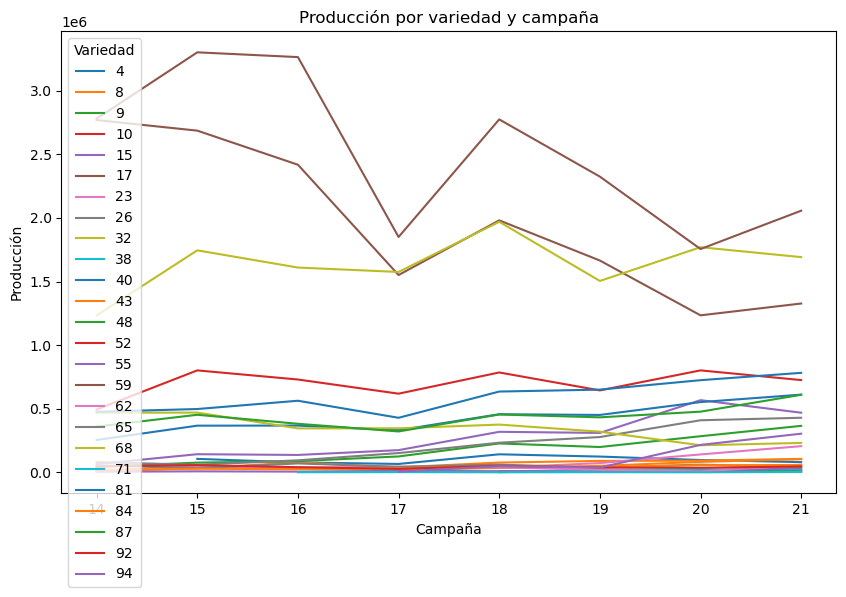

In [20]:
#Veamos gráficamente la evolución de la producción por variedad de uva.
prodvariedad.plot(kind='line', figsize=(10, 6))
plt.xlabel('Campaña')
plt.ylabel('Producción')
plt.title('Producción por variedad y campaña')
plt.legend(title='Variedad', loc='upper left')
plt.show()
# Entre las variedades de uva más importantes se observa como las variedades 17 y 59 cuentan 
# con una ligera tendencia decreciente hasta equipararse con la variedad 32 que mantiene una
# tendencia constante.

In [21]:
# Vamos a estudiar si la productividad de cada tipo de uva es la misma
# Empezamos trabajando con 2021.
df21=df[df['CAMPAÑA']==21]
df21=df21.groupby(['VARIEDAD']).agg({'SUPERFICIE': 'sum', 'PRODUCCION': 'sum'})
df21['Productividad'] = df21['PRODUCCION']/df21['SUPERFICIE']
df21.sort_values('PRODUCCION', ascending=False)
# Hay diferencias de productividad considerables entre las variedades 59 y 32, las dos más producidas.

,SUPERFICIE,PRODUCCION,Productividad
VARIEDAD,,,
59,541.62180,2.057070e+06,3797.983003
32,298.60180,1.692130e+06,5666.844801
17,320.46144,1.327676e+06,4143.012500
81,151.49340,7.830020e+05,5168.555198
52,165.02970,7.260600e+05,4399.571713
40,100.52120,6.117700e+05,6085.979873
87,80.27100,6.106400e+05,7607.230507
15,87.60210,4.697000e+05,5361.743611
26,74.61630,4.300705e+05,5763.761184


In [22]:
# Ahora trabajamos con el año 2020.
df20=df[df['CAMPAÑA']==20]
df20=df20.groupby(['VARIEDAD']).agg({'SUPERFICIE': 'sum', 'PRODUCCION': 'sum'})
df20['Productividad'] = df20['PRODUCCION']/df20['SUPERFICIE']
df20.sort_values('PRODUCCION', ascending=False)
# De nuevo hay diferencias de productividad significativas entre las variedades 32 y 59.

,SUPERFICIE,PRODUCCION,Productividad
VARIEDAD,,,
32,292.28052,1.770020e+06,6055.895035
59,543.10160,1.755640e+06,3232.618354
17,341.49650,1.234820e+06,3615.908216
52,161.65530,8.023200e+05,4963.153079
81,153.05290,7.253205e+05,4739.018133
15,87.01610,5.682600e+05,6530.515617
40,100.39730,5.530700e+05,5508.813484
87,74.32880,4.779500e+05,6430.212784
26,67.39080,4.104504e+05,6090.599500


### Evolución de la producción por finca

In [23]:
# Veamos ahora cuánto produce cada finca.
df_fincas = df_train.groupby(['ID_FINCA', 'CAMPAÑA']).agg({'PRODUCCION': 'sum'})
df_fincas.head(40)

PRODUCCION
ID_FINCA CAMPAÑA            
200      14         1900.000
         15          778.104
         16         1636.200
         17          829.008
         18          607.212
         19          392.688
         20          545.400
439      14         2215.200
         15         3208.400
         16         6354.400
         21         1901.402
447      14         1824.700
         15         3242.106
         16         2524.284
         17         1336.986
         20         2828.540
         21         2037.340
523      14         2290.400
         17         3732.000
         18         2836.074
         19         1225.824
         20          947.844
         21          745.122
528      14        22780.000
779      14         2890.000
         15         5190.000
         16         4780.000
         17         3910.000
         18         5337.500
         19         5232.500
797      14        42750.000
         15        53450.000
         16        55930.000
         17        45840.000
         18        39490.000
         19        43360.000
         20        10080.000
         21        21890.000
812      14         4420.000
         15         4150.000

In [24]:
# Veamos cuáles son las fincas con mayores niveles de producción.
df_fincas_total = df_fincas.groupby(['ID_FINCA']).agg({'PRODUCCION': 'sum'})
df_fincas_total = df_fincas_total.sort_values('PRODUCCION', ascending = False)
df_fincas_total

,PRODUCCION
ID_FINCA,
49636,2.119196e+06
4024,1.746138e+06
95678,1.706991e+06
48877,1.280985e+06
61177,1.010916e+06
...,...
41419,1.560000e+02
6532,1.145000e+02
55056,1.129000e+02


In [25]:
# Centrémonos en las 5 fincas con mayor producción.
top5_fincas=df_fincas['PRODUCCION'][df_fincas_total.index[:5]]
top5_fincas = top5_fincas.unstack('ID_FINCA')
top5_fincas

ID_FINCA,49636,4024,95678,48877,61177
CAMPAÑA,,,,,
14,239445.6,192693.1000,189340.000,58014.138,108040.000
15,390200.0,299968.2736,259820.000,125154.539,147460.000
16,343910.0,247038.7540,233182.305,121366.454,133160.000
17,237430.0,197759.8670,180994.758,105696.757,91170.000
18,323910.0,217102.9950,232988.858,132995.121,146406.010
19,215480.0,235914.2020,183985.582,181946.404,137837.820
20,177270.0,181543.5570,200081.277,251842.912,128223.575
21,191550.0,174116.7680,226598.009,303968.571,118618.170


Text(0, 0.5, 'Producción')

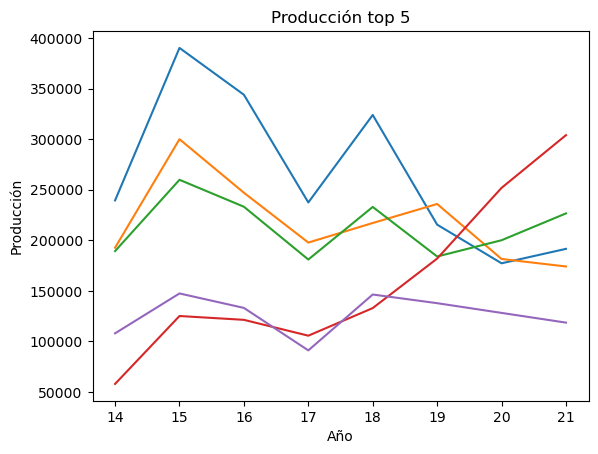

In [26]:
# Veamos la evolución de la producción de estas 5 fincas.
top5_fincas.plot(legend=None)

plt.title('Producción top 5')
plt.xlabel('Año')
plt.ylabel('Producción')
#La finca que partía en quinta posición cuenta con una tendencia creciente que la coloca en la 
# última campaña como la finca con mayor producción. Las demás fincas no cuentan con una tendencia
# claramente definida aunque la finca que partía en primera posición tiene una tendencia ligeramente
# decreciente que la coloca en 2021 en tercera posición.

In [27]:
# Parece que puede haber fincas que presentan una crecimiento o decrecimiento tendencial en la
# producción. Vamos a comprobar si representan una proporción significativa de la muestra. 
# Para ello comenzamos creando el dataframe df_trend, que muestra la producción por finca a lo
# largo de los años.
df_trend=df_train.groupby(['ID_FINCA', 'CAMPAÑA']).agg({'PRODUCCION':'sum'})
df_trend=df_trend.unstack().transpose()
df_trend

ID_FINCA               200       439       447       523      528     779    \
           CAMPAÑA                                                            
PRODUCCION 14       1900.000  2215.200  1824.700  2290.400  22780.0  2890.0   
           15        778.104  3208.400  3242.106       NaN      NaN  5190.0   
           16       1636.200  6354.400  2524.284       NaN      NaN  4780.0   
           17        829.008       NaN  1336.986  3732.000      NaN  3910.0   
           18        607.212       NaN       NaN  2836.074      NaN  5337.5   
           19        392.688       NaN       NaN  1225.824      NaN  5232.5   
           20        545.400       NaN  2828.540   947.844      NaN     NaN   
           21            NaN  1901.402  2037.340   745.122      NaN     NaN   

ID_FINCA              797     812     917       966    ...    98814  \
           CAMPAÑA                                     ...            
PRODUCCION 14       42750.0  4420.0   698.7       NaN  ...  48486.5   
           15       53450.0  4150.0   698.7       NaN  ...  16100.0   
           16       55930.0  5420.0  4569.6    48.015  ...  46780.0   
           17       45840.0  5260.0  3187.5  2873.140  ...   9420.0   
           18       39490.0  5780.0     NaN  1122.775  ...  50760.0   
           19       43360.0  4090.0  3468.0   710.040  ...  88860.0   
           20       10080.0  3800.0     NaN       NaN  ...  13630.0   
           21       21890.0  3560.0  2250.0  1101.435  ...  38570.0   

ID_FINCA                98825     98871     98995   99033    99108   99146  \
           CAMPAÑA                                                           
PRODUCCION 14             NaN   895.000  5675.000  2284.2   4520.0     NaN   
           15             NaN  1205.000  1880.000     NaN  11900.0  6480.0   
           16             NaN  1890.000  3902.858     NaN   7510.0  4080.0   
           17             NaN   560.000  3743.395     NaN   5300.0  6060.0   
           18             NaN   885.000  4967.232     NaN   5750.0  3700.0   
           19             NaN   765.000  3353.477     NaN   3300.0  3380.0   
           20             NaN       NaN  3807.528     NaN   6140.0  3300.0   
           21       13783.602   676.872  3308.716     NaN   4490.0  4730.0   

ID_FINCA               99282   99377      99693  
           CAMPAÑA                               
PRODUCCION 14       6630.663     NaN  16856.590  
           15       8000.800  2280.0  14480.844  
           16       9230.000  1550.0  15931.125  
           17       5840.000     NaN  20130.201  
           18       9070.000  2160.0  17597.034  
           19       7380.000  1840.0  18405.387  
           20       6710.000  2300.0  26876.300  
           21       8460.000  2460.0  35418.700  

[8 rows x 1193 columns]

In [28]:
# La idea inicial es llevar a cabo una regresión lineal de la producción a lo largo del tiempo. 
# La pendiente de la regresión indicará cuánto aumenta la producción por finca cada año. 
# Comenzaremos trabajando con aquellas fincas que han producido durante todas las campañas
#presentes en el dataset por lo que eliminamos las fincas con valores NaN.
df_trend=df_trend.dropna(axis=1)
df_trend

ID_FINCA              797     812     1142       1190       1270     1777   \
           CAMPAÑA                                                           
PRODUCCION 14       42750.0  4420.0  2106.5  18222.600   4820.000  514.800   
           15       53450.0  4150.0  2128.5  20662.400   9530.000  486.200   
           16       55930.0  5420.0  1086.0  27137.000  13305.835  596.200   
           17       45840.0  5260.0   648.5  16193.008   7264.790  754.650   
           18       39490.0  5780.0    89.5  10150.206  11817.860  880.984   
           19       43360.0  4090.0  1047.5  17080.272   4803.320  355.524   
           20       10080.0  3800.0   682.0  10382.922   7962.955  304.096   
           21       21890.0  3560.0   750.0  11332.728  12391.132  190.060   

ID_FINCA                 2083       2360     2486     2821   ...   97945  \
           CAMPAÑA                                           ...           
PRODUCCION 14       10970.0000  27702.000   9060.0  17210.0  ...  1155.0   
           15       26140.0000  43934.400  11100.0  24020.0  ...  1820.0   
           16       32270.0000  31010.400   9780.0  21210.0  ...  1100.0   
           17        7530.0000  21122.450   8210.0  12900.0  ...   480.0   
           18       49760.0000  33045.240  10560.0  20820.0  ...  1145.0   
           19       60770.0000  20839.030   6970.0  15600.0  ...  2722.5   
           20       40250.3728    838.770   8940.0  20480.0  ...  1935.0   
           21       32440.8096  23654.886  10560.0  10970.0  ...  2542.5   

ID_FINCA                 98118    98140    98265  98571    98814     98995  \
           CAMPAÑA                                                           
PRODUCCION 14        3663.3480  27073.2  15990.0   60.0  48486.5  5675.000   
           15       23969.8140  41035.4  17280.0  200.0  16100.0  1880.000   
           16       18788.1240  36559.0  16080.0  150.0  46780.0  3902.858   
           17       17090.6270  18568.5   6860.0  150.0   9420.0  3743.395   
           18       22684.2000  33112.0  19270.0  510.0  50760.0  4967.232   
           19       11632.1250  18720.5   9660.0  500.0  88860.0  3353.477   
           20       12551.1950  31396.0  17160.0  410.0  13630.0  3807.528   
           21       18888.7326  56335.0    940.0  250.0  38570.0  3308.716   

ID_FINCA              99108     99282      99693  
           CAMPAÑA                                
PRODUCCION 14        4520.0  6630.663  16856.590  
           15       11900.0  8000.800  14480.844  
           16        7510.0  9230.000  15931.125  
           17        5300.0  5840.000  20130.201  
           18        5750.0  9070.000  17597.034  
           19        3300.0  7380.000  18405.387  
           20        6140.0  6710.000  26876.300  
           21        4490.0  8460.000  35418.700  

[8 rows x 444 columns]

In [29]:
# Guardamos en la variables fincas los identificadores de las fincas.
fincas=df_trend.transpose().index
# Guardamos en x los años correspondientes a las diferentes campañas.
x=list(set(df_train['CAMPAÑA'].values))
x=np.array(x).reshape(-1,1)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
# Llevamos a cabo modelos de regresión lineal para cada finca y mostramos aquellas cuya producción
# varía tendencialmente, tanto positiva como negativamente, en más de 5000 unidades.
for i in fincas:
    y=df_trend.loc[:, i]
    model.fit(x,y)
    if abs(model.coef_) > 5000:
        print('Finca: ', i, 'Pendiente: ', model.coef_)
# Se observan varias fincas con tendencias de producción notables.

Finca:  4024 Pendiente:  [-8764.14803571]
Finca:  10376 Pendiente:  [-9838.6872619]
Finca:  14843 Pendiente:  [17172.15954762]
Finca:  45489 Pendiente:  [6408.13508333]
Finca:  48877 Pendiente:  [30525.7275]
Finca:  49541 Pendiente:  [5102.26190476]
Finca:  49636 Pendiente:  [-20222.96666667]
Finca:  52008 Pendiente:  [5558.09685714]
Finca:  58769 Pendiente:  [7228.45238095]
Finca:  68089 Pendiente:  [11520.26640476]
Finca:  72803 Pendiente:  [7259.30019048]
Finca:  80627 Pendiente:  [12265.33883333]
Finca:  83472 Pendiente:  [-5551.66666667]
Finca:  85984 Pendiente:  [-5463.98858333]
Finca:  86582 Pendiente:  [-9482.51785714]
Finca:  95476 Pendiente:  [6099.74264286]


In [33]:
# La finca con mayor pendiente en valor absoluto (20.223) es la 49636, veamos cómo ha evolucionado
# su producción.
df_trend.loc[:, 49636]
# Se observa como entre 2015 y 2018 la producción de la finca era notablemente superior a la 
# recogida de los años 2019 a 2021. Sin embargo no se observa que la producción tienda a disminuir
# 20.000 unidades al año. De hecho observamos como la producción de la campaña 21 supera a la
# producción de la campaña 20. Podríamos decir que se ha producido un cambio de nivel entre las
# campañas 18 y 19. Por tanto, al menos para esta finca, no parece adecuado estimar la evolución
# tendencial de la producción en base a la tendencia lineal de la producción desde 2014. Podría
# ser más efectivo analizar la evolución tendencial de la producción a corto plazo, teniendo en
# cuenta las 3 o 4 últimas campañas.

            CAMPAÑA
PRODUCCION  14         239445.6
            15         390200.0
            16         343910.0
            17         237430.0
            18         323910.0
            19         215480.0
            20         177270.0
            21         191550.0
Name: 49636, dtype: float64

### Análisis de superficie y producción por estación y tipo de uva

In [34]:
# Vamos a estudiar la superfecie por finca y por tipo de uva.
# Creamos el dataframe superficies, que contiene las filas con datos sobre superficie.
superficies=df[df['SUPERFICIE']>0]
# Agrupamos por finca, variedad y campaña y calculamos la superficie y producción.
superficies=superficies.groupby(['ID_FINCA', 'VARIEDAD', 'CAMPAÑA']).agg({'SUPERFICIE': 'sum', 'PRODUCCION': 'sum'})
# Nos quedamos únicamente con las fincas que producen y tienen datos sobre superficie en la 
# campaña 22.
id_fincas_filtered = superficies.loc[(slice(None), slice(None), 22), :].index.get_level_values(0).unique()
superficies = superficies.loc[id_fincas_filtered, :]
superficies
# Observamos como solo existen datos disponibles de superficie para las campañas 20, 21 y 22.

SUPERFICIE  PRODUCCION
ID_FINCA VARIEDAD CAMPAÑA                        
439      9        21           1.0800    1901.402
                  22           1.0800       0.000
447      40       20           0.4694    2828.540
                  21           0.4694    2037.340
                  22           0.4694       0.000
...                               ...         ...
99693    81       20           6.3500   26876.300
                  21           6.3500   35418.700
                  22           6.3397       0.000
99793    52       22           0.1326       0.000
         87       22           0.0189       0.000

[2841 rows x 2 columns]

<AxesSubplot:xlabel='ID_ESTACION'>

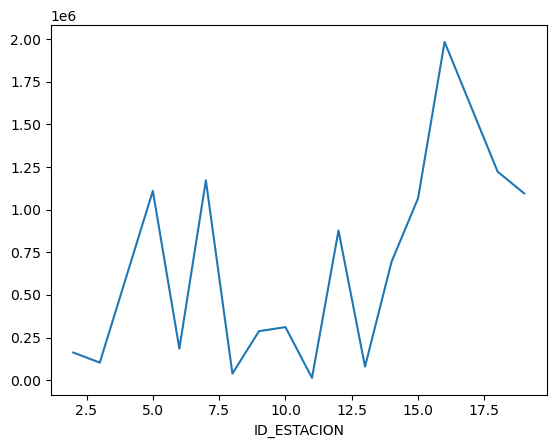

In [35]:
# Estudiamos la producción por estación.
prodest=df[df['CAMPAÑA']==21]
prodest.groupby('ID_ESTACION')['PRODUCCION'].sum().plot()
# Hay distintas estaciones con producción significativa en 2021. Destacan las estaciones 5, 7, 
# 15, 16, 18 y 19.

In [36]:
# Agrupamos las fincas que abarca cada estación.
estacion = df.groupby('ID_ESTACION')['ID_FINCA'].unique()
# Generamos un dataframe que incluye las filas con superficie positiva correspondiente a una
# estación dada y calculamos la superficie y producción total agrupando por finca, variedad y campaña.
# Tomaremos la estación 7 por ser una de las que mayor producción tuvo en 2021.
superficies=df[(df['SUPERFICIE']>0) & (df['ID_FINCA'].isin(estacion[7]))]
superficies=superficies.groupby(['ID_FINCA', 'VARIEDAD', 'CAMPAÑA']).agg({'SUPERFICIE': 'sum', 'PRODUCCION': 'sum'})
# Nos quedamos únicamente con los agrupamientos que incluyen datos para la campaña 22, es decir,
# aquellas fincas y variedad que tienen datos de superficie.
id_fincas_filtered = superficies.loc[(slice(None), slice(None), 22), :].index.get_level_values(0).unique()
superficies = superficies.loc[id_fincas_filtered, :]
superficies

SUPERFICIE  PRODUCCION
ID_FINCA VARIEDAD CAMPAÑA                        
439      9        21           1.0800    1901.402
                  22           1.0800       0.000
1270     9        20           2.4800    7962.955
                  21           2.4800   11788.348
                  22           2.4800       0.000
...                               ...         ...
98995    68       21           0.5746    2338.716
                  22           0.5746       0.000
99108    52       20           1.6110    6140.000
                  21           1.6110    4490.000
                  22           1.6110       0.000

[373 rows x 2 columns]

In [37]:
# Queremos analizar los datos de una estación y una variedad concreta. Ya habíamos tomado la estación
# 7 y ahora tomaremos la variedad 59. 
for finca in set(superficies.index.get_level_values(0)):
    subdf=superficies.loc[(finca,slice(None),slice(None))]
    for variedad in set(subdf.index.get_level_values(0)):
        if variedad == 59: # Se pueden probar 17 32 59, las más cuantiosas
            subbdf=subdf.loc[(variedad,slice(None))]
            if subbdf.index[-1]==22 and len(subbdf.index)>2: # Vamos a tomar aquellas fincas que
                # tengan datos de superficie en las campañas 20, 21 y 22
                subbdf['Productividad']=subbdf['PRODUCCION']/subbdf['SUPERFICIE'] # Además de la
                # superficie y la producción observamos también la productividad por unidad de
                #superficie
                print(finca, subbdf, "\n")
# En primer lugar observamos cambios de productividad sospechosos y poco fiables causados por cambios
# en la superficie. Si nos fijamos en la finca 68.850 su superficie se ha reducido a la mitad mientras
# que su producción ha crecido un 40%, lo que supone que su productividad se triplique. En cambio, la 
# productividad de las demás fincas no sufre cambios tan bruscos. Por lo tanto parece que los
# cambios en superficie deben tomarse con cuidado y tal vez no sean significativos o adecuados para
# predecir, lo comprobaremos a continuación con un modelo de regresión lineal que mida los cambios de 
# producción en función de los cambios de superficie.
# En segundo lugar, al filtrar por estación y variedad el efecto de las variables meteorológicas 
# sobre la productividad debería ser similar para todas las fincas. Vamos a fijarnos en fincas
# sin cambios de superficie y con producción superior a 5.000 para hacer un análisis más robusto
# y certero.
# Se observa como algunas fincas (74.473, 80.170, 93.147) sufrieron una reducción notable en su
# producción en la campaña 21 mientras que otras fincas (32.795, 68.850, 79.653) experimentaron
# un fuerte crecimiento. Esto puede deberse a cambios tendenciales en la producción de cada finca.
# Por tanto, además de analizar la significatividad de los cambios de superficie
# en la predicción de la cantidad producidad, también debemos estudiar si las tendencias de 
# producción y los fenómenos meteorológicos influyen de manera multivariante en la producción.

32795          SUPERFICIE  PRODUCCION  Productividad
CAMPAÑA                                       
20             3.87     26770.0    6917.312661
21             3.84     31890.0    8304.687500
22             3.84         0.0       0.000000 

13871          SUPERFICIE  PRODUCCION  Productividad
CAMPAÑA                                       
20             1.41      3920.0    2780.141844
21             1.41      3850.0    2730.496454
22             1.41         0.0       0.000000 

71788          SUPERFICIE  PRODUCCION  Productividad
CAMPAÑA                                       
20           0.2962    2280.912    7700.580689
21           0.2962    2100.840    7092.640108
22           0.2962       0.000       0.000000 

51311          SUPERFICIE  PRODUCCION  Productividad
CAMPAÑA                                       
20           0.7516    1469.786    1955.542842
21           0.7598     724.660     953.750987
22           0.3799       0.000       0.000000 

23668          SUPERFICIE  P

In [38]:
# Vamos también a comprobar si hay diferencias de productividad por modo.
modo=df_train[df_train['CAMPAÑA']==20]
modo=modo[modo['SUPERFICIE']>0]
modo['Productividad 20']=modo['PRODUCCION']/modo['SUPERFICIE']
modo.groupby('MODO').agg({'Productividad 20': 'mean'})

,Productividad 20
MODO,
1,3167.210307
2,5668.534080


In [39]:
modo=df_train[df_train['CAMPAÑA']==21]
modo=modo[modo['SUPERFICIE']>0]
modo['Productividad 21']=modo['PRODUCCION']/modo['SUPERFICIE']
modo.groupby('MODO').agg({'Productividad 21': 'mean'})
#Parece que modo 2 es más productivo tanto para año 20 como 21.
#Productividad de modo 1 crece en 20-21 y modo 2 decrece en 20-21.

,Productividad 21
MODO,
1,3616.033406
2,5293.063796


## Tratamiento Alternativo Superfice

Fincas con un solo registro por año y mismo valor de superficie

In [40]:
df_filtered = df[df['CAMPAÑA'].isin([20, 21, 22])]
df_grouped = df_filtered.groupby(['ID_FINCA', 'CAMPAÑA']).size().reset_index(name='count')

# Filtrar las fincas que tienen un solo registro por campaña 20, 21 y 22, y mismo valor en SUPERFICIE en esas campañas
valid_id_fincas = df_grouped.groupby('ID_FINCA').filter(lambda x: (x['count'].nunique() == 1) and (x['CAMPAÑA'].nunique() == 3) and (x['CAMPAÑA'].isin([20, 21, 22])).all() and (x[x['CAMPAÑA'] == 20]['CAMPAÑA'].count() == 1) and (x[x['CAMPAÑA'] == 21]['CAMPAÑA'].count() == 1) and (x[x['CAMPAÑA'] == 22]['CAMPAÑA'].count() == 1))

# Obtener la lista de ID_FINCA que cumplen con todas las condiciones
valid_id_fincas = valid_id_fincas['ID_FINCA'].unique().tolist()
valid_id_fincas
len(valid_id_fincas)

588

In [41]:
df[df["ID_FINCA"]==1142]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
55,14,1142,464,14,655.0,59,1,0,1,0.00,2106.5
1201,15,1142,464,14,655.0,59,1,0,1,0.00,2128.5
2317,16,1142,464,14,655.0,59,1,0,1,0.00,1086.0
3397,17,1142,464,14,655.0,59,1,0,1,0.00,648.5
4415,18,1142,464,14,655.0,59,1,0,1,0.00,89.5
5470,19,1142,464,14,655.0,59,1,0,1,0.00,1047.5
6519,20,1142,464,14,655.0,59,1,0,1,0.85,682.0
7533,21,1142,464,14,655.0,59,1,0,1,0.85,750.0
8603,22,1142,464,14,655.0,59,1,0,1,0.85,NaN


In [42]:
#Para este tipo de fincas tiene sentido imputar por el único valor de superficie registrado
# Crear una copia del DataFrame df para realizar las modificaciones
df_modified = df.copy()

# Recorrer la lista de ID_FINCA válidos
for id_finca in valid_id_fincas:
    # Obtener el valor de SUPERFICIE en la campaña 20 para el ID_FINCA actual
    superficie_20 = df_modified[(df_modified['CAMPAÑA'] == 20) & (df_modified['ID_FINCA'] == id_finca)]['SUPERFICIE'].values[0]
    
    # Actualizar el valor de SUPERFICIE en las campañas 14, 15, 16, 17, 18, 19 para el ID_FINCA actual
    df_modified.loc[(df_modified['ID_FINCA'] == id_finca) & (df_modified['CAMPAÑA'].isin([14, 15, 16, 17, 18, 19])), 'SUPERFICIE'] = superficie_20

# Verificar los cambios realizados
df_modified[df_modified['ID_FINCA']==1142]


,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
55,14,1142,464,14,655.0,59,1,0,1,0.85,2106.5
1201,15,1142,464,14,655.0,59,1,0,1,0.85,2128.5
2317,16,1142,464,14,655.0,59,1,0,1,0.85,1086.0
3397,17,1142,464,14,655.0,59,1,0,1,0.85,648.5
4415,18,1142,464,14,655.0,59,1,0,1,0.85,89.5
5470,19,1142,464,14,655.0,59,1,0,1,0.85,1047.5
6519,20,1142,464,14,655.0,59,1,0,1,0.85,682.0
7533,21,1142,464,14,655.0,59,1,0,1,0.85,750.0
8603,22,1142,464,14,655.0,59,1,0,1,0.85,NaN


In [43]:
df=df_modified

Fincas con más de un registro en las campañas 20, 21 y 22 que tienen el mismo valor de SUPERFICIE para cada VARIEDAD en las campañas 20 y 21

In [44]:
# Filtrar las campañas 20, 21 y 22
df_filtered = df[df['CAMPAÑA'].isin([20, 21])]

# Obtener las fincas con más de un registro en las campañas 20, 21 y 22
valid_id_fincas = df_filtered.groupby('ID_FINCA').filter(lambda x: x['CAMPAÑA'].nunique() > 1)

# Filtrar las fincas que tienen el mismo valor de SUPERFICIE para cada VARIEDAD en las campañas 20 y 21
valid_id_fincas = valid_id_fincas.groupby(['ID_FINCA', 'VARIEDAD']).filter(lambda x: x['SUPERFICIE'].nunique() == 1 and set(x['CAMPAÑA']) == {20, 21})

# Obtener la lista de ID_FINCA que cumplen con todas las condiciones
valid_id_fincas = valid_id_fincas['ID_FINCA'].unique().tolist()
len(valid_id_fincas)

670

In [45]:
df[df['ID_FINCA']== 17321]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
605,14,17321,449,15,625.0,9,1,0,0,0.0000,530.0
1759,15,17321,449,15,625.0,9,1,0,0,0.0000,2400.0
1760,15,17321,449,15,625.0,59,1,0,1,0.0000,898.5
2862,16,17321,449,15,625.0,9,1,0,0,0.0000,2460.0
2863,16,17321,449,15,625.0,59,1,0,1,0.0000,763.5
3913,17,17321,449,15,625.0,9,1,0,0,0.0000,2890.0
3914,17,17321,449,15,625.0,59,1,0,1,0.0000,573.0
4985,18,17321,449,15,625.0,9,1,0,0,0.0000,4750.0
4986,18,17321,449,15,625.0,59,1,0,1,0.0000,1036.5
6054,19,17321,449,15,625.0,9,1,0,0,0.0000,2080.0


In [46]:
#Para estas fincas tiene sentido imputar por el valor correspondiente de la superficie para cada variedad
# Filtrar las filas correspondientes a los ID_FINCA en la lista valid_id_fincas
df_filtered = df[df['ID_FINCA'].isin(valid_id_fincas)]

# Filtrar las campañas 14-19 y 20
df_filtered = df_filtered[df_filtered['CAMPAÑA'].isin(range(14, 20)) | df_filtered['CAMPAÑA'].eq(20)]

# Crear un diccionario para almacenar los valores de SUPERFICIE del año 20 por VARIEDAD de UVA
superficie_dict = df_filtered[df_filtered['CAMPAÑA'].eq(20)].groupby(['ID_FINCA', 'VARIEDAD'])['SUPERFICIE'].first().to_dict()

# Imputar los valores de SUPERFICIE de los años 14-19 con los valores del año 20 según la VARIEDAD de UVA
df['SUPERFICIE'] = df.apply(lambda row: superficie_dict.get((row['ID_FINCA'], row['VARIEDAD']), row['SUPERFICIE']) if row['ID_FINCA'] in valid_id_fincas and row['CAMPAÑA'] in range(14, 19+1) else row['SUPERFICIE'], axis=1)

df[df['ID_FINCA']==17321 ]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
605,14,17321,449,15,625.0,9,1,0,0,0.6409,530.0
1759,15,17321,449,15,625.0,9,1,0,0,0.6409,2400.0
1760,15,17321,449,15,625.0,59,1,0,1,0.1620,898.5
2862,16,17321,449,15,625.0,9,1,0,0,0.6409,2460.0
2863,16,17321,449,15,625.0,59,1,0,1,0.1620,763.5
3913,17,17321,449,15,625.0,9,1,0,0,0.6409,2890.0
3914,17,17321,449,15,625.0,59,1,0,1,0.1620,573.0
4985,18,17321,449,15,625.0,9,1,0,0,0.6409,4750.0
4986,18,17321,449,15,625.0,59,1,0,1,0.1620,1036.5
6054,19,17321,449,15,625.0,9,1,0,0,0.6409,2080.0


In [47]:
# Reemplazar los valores 0 de SUPERFICIE por NaN
df['SUPERFICIE'] = df['SUPERFICIE'].replace(0, np.nan)

In [48]:
df.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD           0
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE     2046
PRODUCCION     1075
dtype: int64

In [49]:
id_fincas_nulas = df[df['SUPERFICIE'].isnull()]['ID_FINCA'].unique().tolist()
len(id_fincas_nulas)

498

Fincas que tengan la(s) misma(s) variedad de uva todos los años

In [50]:
df[df['ID_FINCA']==16488]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
1434,15,16488,700,16,605.0,32,2,0,1,NaN,3010.0
2540,16,16488,700,16,605.0,32,2,0,1,NaN,11100.0
3616,17,16488,700,16,605.0,32,2,0,1,NaN,7190.0
4651,18,16488,700,16,605.0,32,2,0,1,NaN,13610.0
5709,19,16488,700,16,605.0,32,2,0,1,NaN,16910.0
7777,21,16488,700,16,605.0,32,2,0,1,2.7417,18440.0
8849,22,16488,700,16,605.0,32,2,0,1,2.7417,NaN


In [51]:
df[df['ID_FINCA']==2916]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
297,14,2916,677,5,610.0,17,1,0,1,3.800,12558.0
298,14,2916,677,5,610.0,32,2,0,1,2.330,11700.0
299,14,2916,677,5,610.0,59,2,0,1,NaN,4500.0
1442,15,2916,677,5,610.0,32,2,0,1,2.330,22400.0
1443,15,2916,677,5,610.0,17,2,0,1,3.800,12529.0
1444,15,2916,677,5,610.0,59,2,0,1,NaN,12350.0
2551,16,2916,677,5,610.0,32,2,0,1,2.330,7820.0
2552,16,2916,677,5,610.0,17,2,0,1,3.800,21794.0
2553,16,2916,677,5,610.0,59,2,0,1,NaN,8280.0
3624,17,2916,677,5,610.0,17,1,0,1,3.800,3094.0


In [52]:
# Crear una lista de ID_FINCA que cumplan la condición de VARIEDAD en los años 14-19 y 20, 21 o 22
id_fincas_coincidentes = []
for id_finca in id_fincas_nulas:
    variedades_14_19 = df[(df['ID_FINCA'] == id_finca) & (df['CAMPAÑA'].isin(range(14, 20)))]['VARIEDAD'].unique()
    variedades_20_21_22 = df[(df['ID_FINCA'] == id_finca) & (df['CAMPAÑA'].isin([20, 21, 22]))]['VARIEDAD'].unique()
    if set(variedades_14_19) == set(variedades_20_21_22):
        id_fincas_coincidentes.append(id_finca)

In [53]:
#Veo que no hay diferencias significativas entre las superficies de cada fincas entre los distintos años para cada variedad

In [54]:
def dif_max(df, id_fincas_coincidentes):
    max_diferencias_fincas = []

    for id_finca in id_fincas_coincidentes:
        df_selected = df[df['ID_FINCA'] == id_finca]
        variedades = df_selected['VARIEDAD'].unique()
        for variedad in variedades:
            superficies = df_selected[(df_selected['VARIEDAD'] == variedad) & df_selected['CAMPAÑA'].isin([20, 21, 22])]['SUPERFICIE'].dropna()
            if len(superficies) >= 2:
                diferencia = superficies.max() - superficies.min()
                max_diferencias_fincas.append([diferencia, id_finca])

    return max_diferencias_fincas
dif_max(df, id_fincas_coincidentes)

[[0.0, 70378],
 [0.0, 92531],
 [0.0, 92099],
 [0.0, 89768],
 [0.0, 31153],
 [0.0, 74003],
 [0.13730000000000064, 19605],
 [0.07199999999999962, 2916],
 [0.07000000000000028, 2916],
 [0.0, 2916],
 [0.0, 93538],
 [0.0, 93538],
 [0.0, 76588],
 [0.0, 76588],
 [0.0, 28362],
 [0.19999999999999996, 50441],
 [0.0, 70407],
 [0.0, 70407],
 [0.0, 52182],
 [0.0, 70112],
 [0.0, 33084],
 [0.0, 47298],
 [0.0, 21119],
 [0.0, 81717],
 [0.0, 47874],
 [0.0, 47874],
 [0.0040999999999999925, 51311],
 [0.0, 63510],
 [0.0, 917],
 [0.0, 26730],
 [0.0, 58948],
 [0.0, 76361],
 [0.0, 48720],
 [0.0, 73540],
 [0.00990000000000002, 5548],
 [0.0, 72387],
 [0.0, 21481],
 [0.0, 98871],
 [0.0, 32986],
 [0.0, 74812],
 [0.0, 96004],
 [0.0, 51677],
 [0.0, 47053],
 [0.0, 22092],
 [0.6080000000000001, 26979],
 [0.0, 62869],
 [0.2699999999999996, 34244],
 [0.2149000000000001, 78863],
 [0.3386, 12622],
 [0.0, 16488],
 [0.0, 77844],
 [0.0, 93970],
 [0.0, 84689],
 [0.0, 84689],
 [0.00039999999999995595, 66451],
 [0.0, 90597],
 

In [55]:
#Como no hay diferencias grandes de superficie, tendremos que para cada variedad, la superficie será similar a lo largo de estos 
#años. Imputamos por la media de superficie en cada variedad.
def impute(df, id_fincas_coincidentes):
    for id_finca in id_fincas_coincidentes:
        df_selected = df[df['ID_FINCA'] == id_finca]
        variedades = df_selected['VARIEDAD'].unique()
        for variedad in variedades:
            media_superficie = df_selected[df_selected['VARIEDAD'] == variedad]['SUPERFICIE'].mean()
            df.loc[(df['ID_FINCA'] == id_finca) & (df['VARIEDAD'] == variedad) & (df['SUPERFICIE'].isnull()), 'SUPERFICIE'] = media_superficie

    return df
df=impute(df, id_fincas_coincidentes)

In [56]:
df[df['ID_FINCA']==16488]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
1434,15,16488,700,16,605.0,32,2,0,1,2.7417,3010.0
2540,16,16488,700,16,605.0,32,2,0,1,2.7417,11100.0
3616,17,16488,700,16,605.0,32,2,0,1,2.7417,7190.0
4651,18,16488,700,16,605.0,32,2,0,1,2.7417,13610.0
5709,19,16488,700,16,605.0,32,2,0,1,2.7417,16910.0
7777,21,16488,700,16,605.0,32,2,0,1,2.7417,18440.0
8849,22,16488,700,16,605.0,32,2,0,1,2.7417,NaN


In [57]:
df[df['ID_FINCA']==2916]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
297,14,2916,677,5,610.0,17,1,0,1,3.800,12558.0
298,14,2916,677,5,610.0,32,2,0,1,2.330,11700.0
299,14,2916,677,5,610.0,59,2,0,1,1.260,4500.0
1442,15,2916,677,5,610.0,32,2,0,1,2.330,22400.0
1443,15,2916,677,5,610.0,17,2,0,1,3.800,12529.0
1444,15,2916,677,5,610.0,59,2,0,1,1.260,12350.0
2551,16,2916,677,5,610.0,32,2,0,1,2.330,7820.0
2552,16,2916,677,5,610.0,17,2,0,1,3.800,21794.0
2553,16,2916,677,5,610.0,59,2,0,1,1.260,8280.0
3624,17,2916,677,5,610.0,17,1,0,1,3.800,3094.0


In [58]:
df.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD           0
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE     1409
PRODUCCION     1075
dtype: int64

In [59]:
#Para el resto de superficies, necesitamos un modelo de predicción

In [60]:
# Eliminar los registros donde CAMPAÑA=22 (porque quiero usar PRODUCCION como variable independiente) y crear df1421
df1421 = df[df['CAMPAÑA'] != 22]

In [61]:
# Conjunto de entrenamiento
df_entrenamiento = df1421[df1421['SUPERFICIE'].notnull()]

In [62]:
# Conjunto de prueba
df_prueba = df1421[df1421['SUPERFICIE'].isnull()]

In [63]:
from sklearn.model_selection import train_test_split

# Variables independientes (todas excepto SUPERFICIE)
X = df_entrenamiento.drop('SUPERFICIE', axis=1).values
X_nulo=df_prueba.drop('SUPERFICIE', axis=1).values

# Variable dependiente (SUPERFICIE)
y = df_entrenamiento['SUPERFICIE'].values.reshape(-1, 1)

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
# Creamos el modelo de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15, max_depth=6, random_state=42)

# Ajustamos el modelo con los datos de entrenamiento
gbr.fit(X_train, y_train)

y_pred_test=gbr.predict(X_test)

In [67]:
# Vemos como ha sido el entrenamiento
y_pred_train=gbr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f'RMSE en train: {rmse_train:.5f}')
print(f'MAE en train: {mae_train:.5f}')
print("R2 score:", r2)

RMSE en train: 0.57973
MAE en train: 0.38433
R2 score: 0.9548997113545848


In [68]:
# En test
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)
mae=mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)
r2 = r2_score(y_test, y_pred_test)
print("R2 score:", r2)

RMSE: 1.0780501087357484
MAE: 0.604035067669054
R2 score: 0.8360060188195588


In [69]:
gbr.fit(X, y)

GradientBoostingRegressor(learning_rate=0.15, max_depth=6, random_state=42)

In [70]:
y_pred= gbr.predict(X_nulo)

In [71]:
# Obtener los índices de los registros con valores nulos en SUPERFICIE y CAMPAÑA distinta de 22
indices_nulos = (df['SUPERFICIE'].isnull()) & (df['CAMPAÑA'] != 22)

# Imputar los valores nulos con y_pred
df.loc[indices_nulos, 'SUPERFICIE'] = np.squeeze(y_pred)

In [72]:
df.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD           0
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE        9
PRODUCCION     1075
dtype: int64

In [73]:
# Crear df22 con los registros donde CAMPAÑA=22
df22 = df[df['CAMPAÑA'] == 22]
df22.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD           0
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE        9
PRODUCCION     1075
dtype: int64

In [74]:
#Los valores nulos de superficie corresponden a 2022. Las fincas son: 
id_fincas_nulas = df[df['SUPERFICIE'].isnull()]['ID_FINCA'].unique().tolist()
id_fincas_nulas

[4024, 19067, 86582, 77984, 13054, 16692, 78846, 59317]

In [75]:
df[df['ID_FINCA']==4024]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
15,14,4024,919,14,655.0,32,2,0,1,11.320000,54893.9000
16,14,4024,919,14,655.0,87,2,0,0,5.705300,13440.0000
17,14,4024,919,14,655.0,17,2,0,1,9.517653,33878.0000
18,14,4024,919,14,655.0,52,2,0,1,9.267700,34170.0000
19,14,4024,919,14,655.0,59,2,0,1,7.066931,13731.2000
20,14,4024,919,14,655.0,81,2,0,1,13.860000,42580.0000
1161,15,4024,919,14,655.0,32,2,0,1,11.320000,85731.5310
1162,15,4024,919,14,655.0,87,2,0,0,5.705300,49460.0000
1163,15,4024,919,14,655.0,40,2,0,1,7.535000,15932.1730
1164,15,4024,919,14,655.0,17,2,0,1,9.208107,28770.3156


In [76]:
#Imputamos por la media de superficie en cada variedad
df=impute(df, id_fincas_nulas)

In [77]:
df[df['ID_FINCA']==4024]

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
15,14,4024,919,14,655.0,32,2,0,1,11.320000,54893.9000
16,14,4024,919,14,655.0,87,2,0,0,5.705300,13440.0000
17,14,4024,919,14,655.0,17,2,0,1,9.517653,33878.0000
18,14,4024,919,14,655.0,52,2,0,1,9.267700,34170.0000
19,14,4024,919,14,655.0,59,2,0,1,7.066931,13731.2000
20,14,4024,919,14,655.0,81,2,0,1,13.860000,42580.0000
1161,15,4024,919,14,655.0,32,2,0,1,11.320000,85731.5310
1162,15,4024,919,14,655.0,87,2,0,0,5.705300,49460.0000
1163,15,4024,919,14,655.0,40,2,0,1,7.535000,15932.1730
1164,15,4024,919,14,655.0,17,2,0,1,9.208107,28770.3156


### DISTRIBUCIONES DE LAS VARIABLES

<AxesSubplot:>

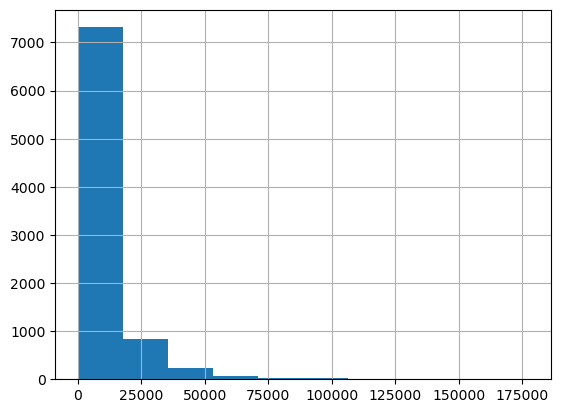

In [78]:
# PRODUCCION
df["PRODUCCION"].hist()


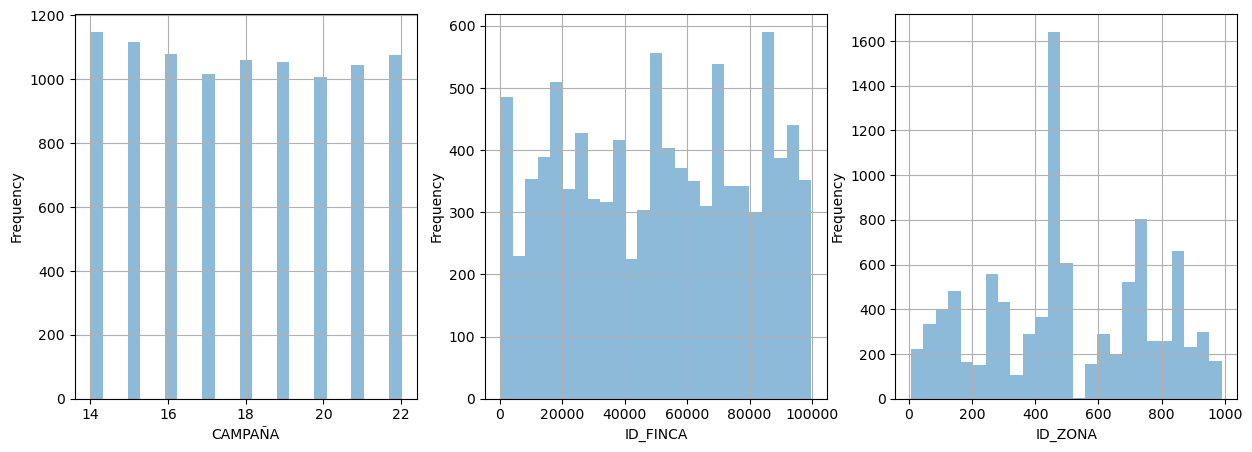

In [79]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['CAMPAÑA'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('CAMPAÑA')

plt.subplot(1,3,2)
df['ID_FINCA'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('ID_FINCA')

plt.subplot(1,3,3)
df['ID_ZONA'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('ID_ZONA')

plt.show()

Observaciones: 
- Contamos con una cantidad similar de datos para cada campaña, lo cual resulta beneficioso debido a que evita inclinar el modelo hacia los acontecimientos de una campaña específica.
- Observamos que hay ciertas fincas que tienen un número considerablemente menor de registros en comparación con otras. Es crucial considerar esta disparidad y asegurarnos de que el modelo no se limite únicamente a predecir con precisión los registros pertenecientes a las fincas más numerosas.
- Al igual que ocurre con el campo ID_FINCA, hay zonas que están considerablemente más presentes en los datos en comparación con otras. Por lo tanto, es necesario estar atentos para evitar que el modelo priorice acertar en las zonas más comunes en lugar de tener una visión equilibrada y precisa en todas las zonas.

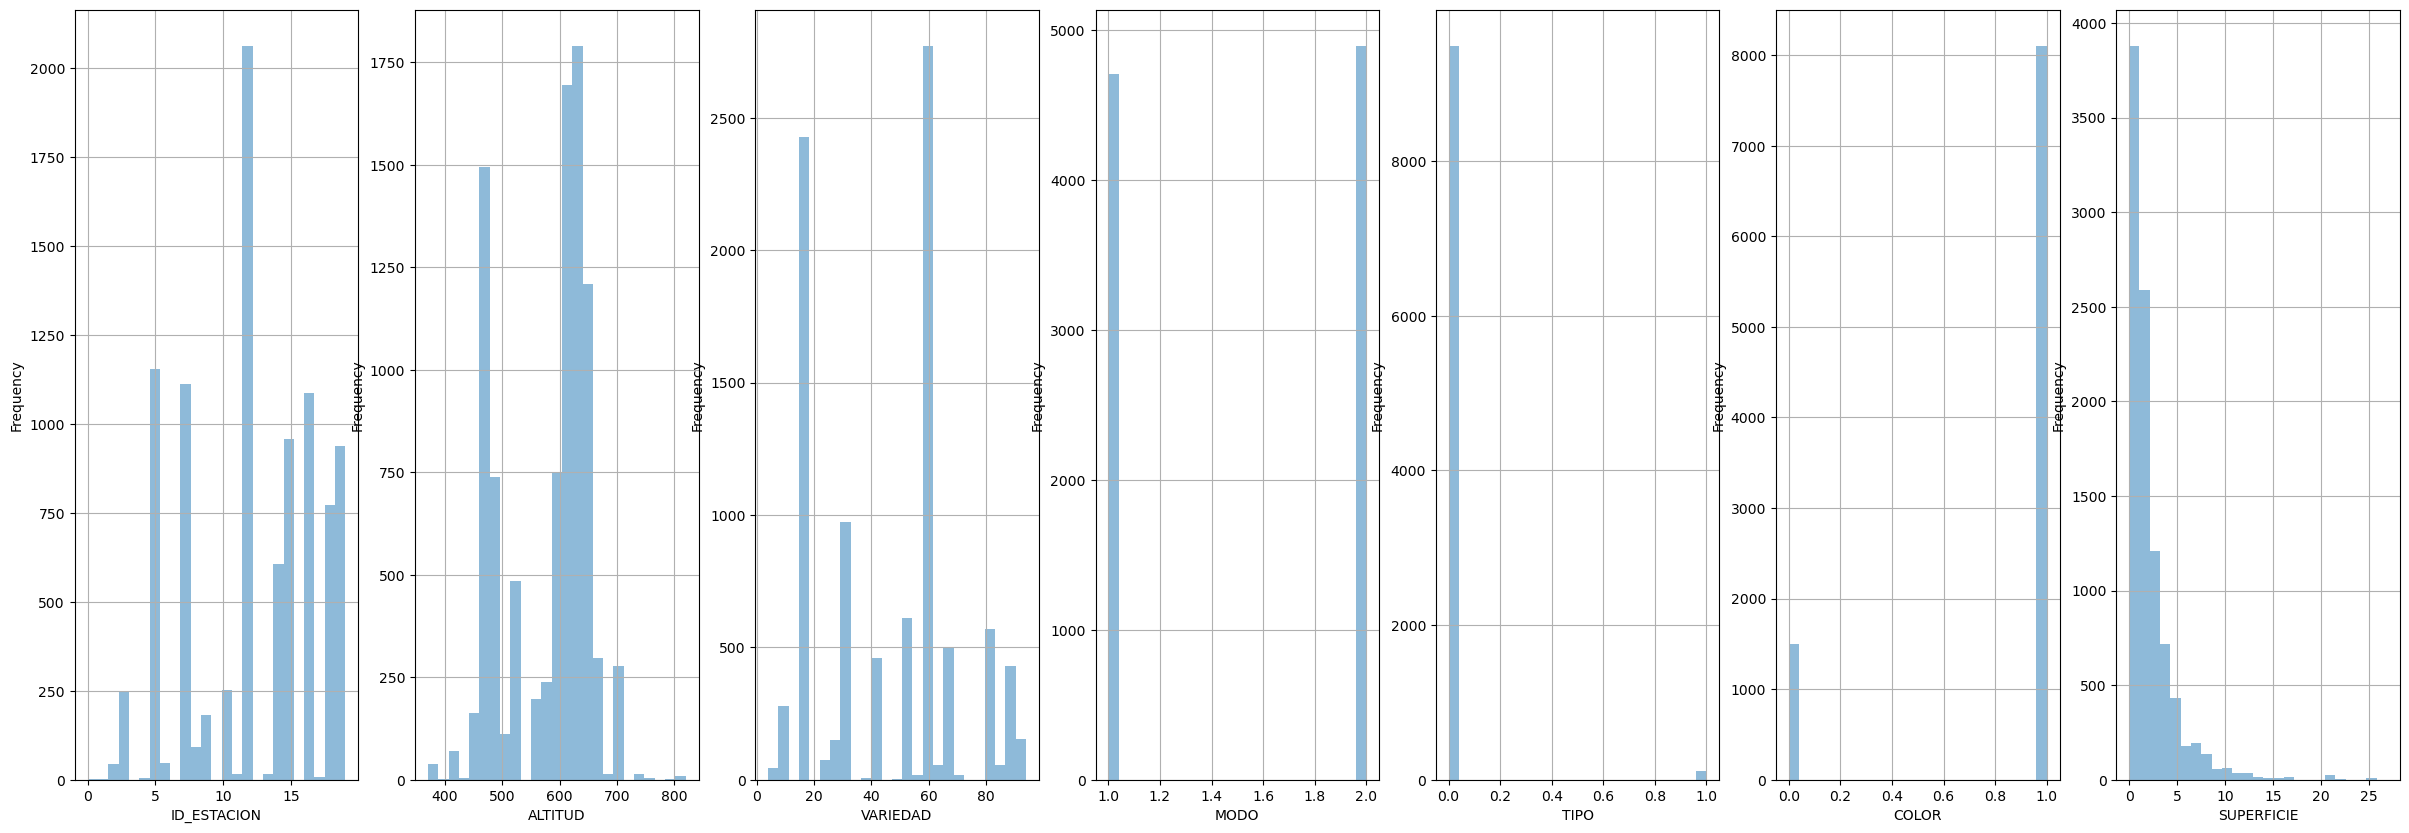

In [80]:
plt.figure(figsize=(30, 10))

plt.subplot(1,7,1)
df['ID_ESTACION'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('ID_ESTACION')

plt.subplot(1,7,2)
df['ALTITUD'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('ALTITUD')

plt.subplot(1,7,3)
df['VARIEDAD'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('VARIEDAD')

plt.subplot(1,7,4)
df['MODO'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('MODO')

plt.subplot(1,7,5)
df['TIPO'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('TIPO')

plt.subplot(1,7,6)
df['COLOR'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('COLOR')

plt.subplot(1,7,7)
df['SUPERFICIE'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('SUPERFICIE')

plt.show()

Observaciones:
- Hay muchos más registros en determinadas estaciones. Esto puede motivar la idea de codificar la variable ID_ESTACION y así contrarrestras este sesgo.
- Los registros para el modo de cultivo están equilibrados.
- Tenemos que tener en cuenta que hay variedades de uva, tipos de cultivo (tipo 1) y colores (color 0) minoritarios.


### Análisis multivariante de la producción mediante modelos de regresión

In [81]:
# Vamos a comenzar a obtener parámetros mediante modelos de regresión lineal para estimar 
# el crecimiento tendencial de la producción para cada finca.
# Creamos el dataframe df_betas, el cual emplearemos para crear una variable 'Betas' que indique 
# la tendencia en la producción absoluta de cada finca, variedad y modo.
df_betas=df.groupby(['ID_FINCA', 'VARIEDAD', 'MODO', 'CAMPAÑA']).agg({'PRODUCCION':'sum'})
df_betas=df_betas.unstack().transpose()
df_betas

ID_FINCA               200       439               447                       \
VARIEDAD                  59        9       52        17                 40   
MODO                       1         2       2         1         2        2   
           CAMPAÑA                                                            
PRODUCCION 14       1900.000       NaN  2215.2  1824.700       NaN      NaN   
           15        778.104       NaN  3208.4       NaN  3242.106      NaN   
           16       1636.200       NaN  6354.4   864.108  1660.176      NaN   
           17        829.008       NaN     NaN       NaN  1336.986      NaN   
           18        607.212       NaN     NaN       NaN       NaN      NaN   
           19        392.688       NaN     NaN       NaN       NaN      NaN   
           20        545.400       NaN     NaN       NaN       NaN  2828.54   
           21            NaN  1901.402     NaN       NaN       NaN  2037.34   
           22            NaN     0.000     NaN       NaN       NaN     0.00   

ID_FINCA               523              528   702    ...   99033    99108  \
VARIEDAD                  32      59       59    59  ...      81       52   
MODO                       2       1        1     2  ...       2        2   
           CAMPAÑA                                   ...                    
PRODUCCION 14            NaN  2290.4  22780.0   NaN  ...  2284.2   4520.0   
           15            NaN     NaN      NaN   NaN  ...     NaN  11900.0   
           16            NaN     NaN      NaN   NaN  ...     NaN   7510.0   
           17       3732.000     NaN      NaN   NaN  ...     NaN   5300.0   
           18       2836.074     NaN      NaN   NaN  ...     NaN   5750.0   
           19       1225.824     NaN      NaN   NaN  ...     NaN   3300.0   
           20        947.844     NaN      NaN   NaN  ...     NaN   6140.0   
           21        745.122     NaN      NaN   NaN  ...     NaN   4490.0   
           22          0.000     NaN      NaN   0.0  ...     NaN      0.0   

ID_FINCA             99146             99282  99377              99693 99793  \
VARIEDAD                17                59     52                 81    52   
MODO                     1       2         2      1       2          1     2   
           CAMPAÑA                                                             
PRODUCCION 14          NaN     NaN  6630.663    NaN     NaN  16856.590   NaN   
           15       6480.0     NaN  8000.800    NaN  2280.0  14480.844   NaN   
           16       4080.0     NaN  9230.000  560.0   990.0  15931.125   NaN   
           17       6060.0     NaN  5840.000    NaN     NaN  20130.201   NaN   
           18          NaN  3700.0  9070.000    NaN  2160.0  17597.034   NaN   
           19          NaN  3380.0  7380.000    NaN  1840.0  18405.387   NaN   
           20          NaN  3300.0  6710.000    NaN  2300.0  26876.300   NaN   
           21          NaN  4730.0  8460.000    NaN  2460.0  35418.700   NaN   
           22          NaN     0.0     0.000    NaN     0.0      0.000   0.0   

ID_FINCA                 
VARIEDAD             87  
MODO                  2  
           CAMPAÑA       
PRODUCCION 14       NaN  
           15       NaN  
           16       NaN  
           17       NaN  
           18       NaN  
           19       NaN  
           20       NaN  
           21       NaN  
           22       0.0  

[9 rows x 1946 columns]

In [82]:
# Definimos la siguiente función que calcula la tendencia a corto plazo de la cantidad que 
# aumenta/decrece la producción de una finca y variedad para una campaña dada. Se toman solo 
# tendencias claramente definidas, dadas por una regresión lineal con un R^2 superior a 0.95.
# Para dicha regresión se toman las cuatro campañas anteriores a la indicada en la función.
def beta(finca, variedad, modo, campaña, df=df_betas): # la función utiliza de manera predefinida
    # el dataframe df_betas
    lr = LinearRegression()
    if df[(finca, variedad, modo)].iloc[(campaña-18):(campaña-14)].isnull().values.any(): # si hay
        # valores missing no hay producción en alguno de los años y por tanto no hay tendencia
        beta = 0
    else:
        x = np.arange(4).reshape(-1,1)
        y = df[(finca, variedad, modo)].iloc[(campaña-18):(campaña-14)].values
        lr.fit(x,y)
        if lr.score(x,y)>0.95: # Si R^2 menor que cierta cota, consideramos que no hay tendencia
            beta = lr.coef_
        else:
            beta = 0
    return beta

In [83]:
# Añadimos los valores de las betas en una nueva columna del dataframe df.
df['Betas']=0
for fila in range(len(df)): # Se coge longitud df_train para no tocar las filas de la campaña 22
    if df.loc[fila, 'CAMPAÑA'] >= 18:  # Para 2018 hacia atrás no calculamos tendencias por no
        # haber datos suficientes
        df.loc[fila, 'Betas']=beta(df.loc[fila, 'ID_FINCA'], df.loc[fila, 'VARIEDAD'], df.loc[fila, 'MODO'], df.loc[fila, 'CAMPAÑA'])

In [84]:
# Vamos a añadir ahora las variables de superficies. Por si hubieran diferencias significativas
# entre crecimiento y decrecimiento de superficies tomaremos las valores positivos y negativos
# por separado.
cambios_superficies=df[df['CAMPAÑA']>19].groupby(['ID_FINCA', 'VARIEDAD', 'CAMPAÑA']).agg({'SUPERFICIE': 'sum', 'PRODUCCION': 'sum'})
cambios_superficies

SUPERFICIE  PRODUCCION
ID_FINCA VARIEDAD CAMPAÑA                        
200      59       20           0.3700     545.400
439      9        21           1.0800    1901.402
                  22           1.0800       0.000
447      40       20           0.4694    2828.540
                  21           0.4694    2037.340
...                               ...         ...
99693    81       20           6.3500   26876.300
                  21           6.3500   35418.700
                  22           6.3397       0.000
99793    52       22           0.1326       0.000
         87       22           0.0189       0.000

[3025 rows x 2 columns]

In [85]:
# Esta función calcula el crecimiento porcentual de la superficie de una finca y variedad. Solo
# considera crecimientos positivos, los decrecimientos son considerados en la función definida a 
# continuación.
def crecimiento_superficie(finca, variedad, campaña, df=cambios_superficies):
    actual = df.loc[(finca, variedad, campaña), 'SUPERFICIE']
    try:
        anterior = df.loc[(finca, variedad, campaña - 1), 'SUPERFICIE']
    except KeyError:
        anterior = actual
    try:
        aum = actual / anterior - 1
    except:
        aum = 0
    if aum < 0:
        aum = 0
    return aum

In [86]:
# Esta función calcula el decrecimiento porcentual de la superfice de una finca y variedad.
def descenso_superficie(finca, variedad, campaña, df=cambios_superficies):
    actual = df.loc[(finca, variedad, campaña), 'SUPERFICIE']
    try:
        anterior = df.loc[(finca, variedad, campaña - 1), 'SUPERFICIE']
    except KeyError:
        anterior = actual
    try:
        desc = actual / anterior - 1
    except:
        desc = 0
    if desc > 0:
        desc = 0
    return desc

In [87]:
# Añadimos los valores de los cambios de superficie a al dataframe df.
df['Aumento superficie']=0
for fila in range(len(df)):
    if df.loc[fila, 'CAMPAÑA'] >= 21:  #Para 2020 hacia atrás no tenemos datos de cambios de 
        # superficie
        df.loc[fila, 'Aumento superficie']=crecimiento_superficie(df.loc[fila, 'ID_FINCA'], df.loc[fila, 'VARIEDAD'], df.loc[fila, 'CAMPAÑA'])
        df['Descenso superficie']=0
for fila in range(len(df)):
    if df.loc[fila, 'CAMPAÑA'] >= 21: 
        df.loc[fila, 'Descenso superficie']=descenso_superficie(df.loc[fila, 'ID_FINCA'], df.loc[fila, 'VARIEDAD'], df.loc[fila, 'CAMPAÑA'])

In [88]:
# Esta función calcula Producción_t / Producción_t-1 para aquellas filas en las que es posible.
def tasa_prod(finca, variedad, modo, campaña, df=df_betas):
    try:
        prod = df[(finca, variedad, modo)].iloc[(campaña-14)]
        prod_ant = df[(finca, variedad, modo)].iloc[(campaña-15)]
        tasa = prod / prod_ant
    except:
        tasa = np.nan
    return tasa

In [89]:
# Añado a la columna 'Tasa producción' el crecimiento porcentual anual de la producción para cada
# finca, variedad y modo.
df['Tasa producción']=0
for fila in range(len(df)):
    df.loc[fila, 'Tasa producción'] = tasa_prod(df.loc[fila, 'ID_FINCA'], df.loc[fila, 'VARIEDAD'], df.loc[fila, 'MODO'], df.loc[fila, 'CAMPAÑA'])

In [90]:
# La función beta que se definió anteriormente devuelve cuánto crece la producción tendencial
# absoluta cada año. 
# Con la función definida a continuación vamos a estimar el porcentaje de crecimiento de producción
# respecto al año anterior con la fórmula beta / E[producción].
def tasa_beta(finca, variedad, modo, campaña, df=df_betas):
    lr = LinearRegression()
    if df[(finca, variedad, modo)].iloc[(campaña-18):(campaña-14)].isnull().values.any(): #Si hay 
        #valores missing no hay producción y por tanto no hay tendencia
        tasa = 1
    else:
        x = np.arange(4).reshape(-1,1)
        y = df[(finca, variedad, modo)].iloc[(campaña-18):(campaña-14)].values
        lr.fit(x,y)
        if lr.score(x,y)>0.95: # Si R^2 menor que cierta cota, consideramos que no hay tendencia
            beta = lr.coef_
            tasa = beta / np.mean(df[(finca, variedad, modo)].iloc[(campaña-18):(campaña-14)].values)
        else:
            tasa = 1
    return tasa

In [91]:
# Añadimos  a la columna 'Tasa betas' el crecimiento porcentual tendencial de la producción por 
# finca, variedad y modo.
df['Tasa betas'] = 1
for fila in range(len(df)):
    if df.loc[fila, 'CAMPAÑA'] in range(18,22):  #Para 2017 hacia atrás no calculamos tendencias por no haber datos suficientes
        df.loc[fila, 'Tasa betas']=tasa_beta(df.loc[fila, 'ID_FINCA'], df.loc[fila, 'VARIEDAD'], df.loc[fila, 'MODO'], df.loc[fila, 'CAMPAÑA'])

In [92]:
import pickle

# En el jupyter correspondiente al análisis explotario del dataset METEO hemos calculado variables
# meteorológicas relevantes para la producción. Basándonos en criterios científicos explicados en
# el pdf utilizaremos como variables las precipitaciones y temperaturas en enero-marzo, abril-mayo
# junio.
with open('precip_mes_16.pkl', 'rb') as f:
    precip_mes_16 = pickle.load(f)
with open('precip_mes_17.pkl', 'rb') as f:
    precip_mes_17 = pickle.load(f)
with open('precip_mes_18.pkl', 'rb') as f:
    precip_mes_18 = pickle.load(f)
with open('precip_mes_19.pkl', 'rb') as f:
    precip_mes_19 = pickle.load(f)
with open('precip_mes_20.pkl', 'rb') as f:
    precip_mes_20 = pickle.load(f)
with open('precip_mes_21.pkl', 'rb') as f:
    precip_mes_21 = pickle.load(f)
with open('precip_mes_22.pkl', 'rb') as f:
    precip_mes_22 = pickle.load(f)
    


with open('t_mes_16.pkl', 'rb') as f:
    t_mes_16 = pickle.load(f)
with open('t_mes_17.pkl', 'rb') as f:
    t_mes_17 = pickle.load(f)
with open('t_mes_18.pkl', 'rb') as f:
    t_mes_18 = pickle.load(f)
with open('t_mes_19.pkl', 'rb') as f:
    t_mes_19 = pickle.load(f)
with open('t_mes_20.pkl', 'rb') as f:
    t_mes_20 = pickle.load(f)
with open('t_mes_21.pkl', 'rb') as f:
    t_mes_21 = pickle.load(f)
with open('t_mes_22.pkl', 'rb') as f:
    t_mes_22 = pickle.load(f)

In [93]:
# Agregamos al dataframe df las columnas correspondientes a las variables meteorológicas mencionadas.
# Estas variables están diferenciadas no solo por campaña sino también por estación meteorológica
# permitiendo obtener conclusiones más certeras.
meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio']
for m in range(len(meses)):
    precip_col = f"precip_{meses[m]}"
    df[precip_col] = np.nan


for c in range(16, 23):
    for e in range(20):
        for m in range(6):
            precip_mes = globals()[f"precip_mes_{c}"][e][m]
            mes_index = meses[m]
            precip_col = f"precip_{mes_index}"
            df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), precip_col] = precip_mes

for m in range(len(meses)):
    temp_col = f"t_mes_{meses[m]}"
    df[temp_col] = np.nan
for c in range(16, 23):
    for e in range(20):
        for m in range(6):
            temp_mes = globals()[f"t_mes_{c}"][e][m]
            mes_index = meses[m]
            temp_col = f"t_mes_{mes_index}"
            df.loc[(df['CAMPAÑA'] == c) & (df['ID_ESTACION'] == e), temp_col] = temp_mes

df['Precip invierno'] = df['precip_enero'] + df['precip_febrero'] + df['precip_marzo']
df['Precip primavera'] = df['precip_abril'] + df['precip_mayo']
df['Precip invierno 2'] = df['Precip invierno']*df['Precip invierno']
df['Precip primavera 2'] = df['Precip primavera']*df['Precip primavera']
df['precip_junio 2'] = df['precip_junio']*df['precip_junio']
df['Temp invierno'] = (df['t_mes_enero'] + df['t_mes_febrero'] + df['t_mes_marzo']) /3
df['Temp primavera'] = (df['t_mes_abril'] + df['t_mes_mayo']) / 2
df['Temp invierno 2'] = df['Temp invierno']*df['Temp invierno']
df['Temp primavera 2'] = df['Temp primavera']*df['Temp primavera']
df['t_mes_junio 2'] = df['t_mes_junio']*df['t_mes_junio']

In [94]:
df

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,Precip invierno,Precip primavera,Precip invierno 2,Precip primavera 2,precip_junio 2,Temp invierno,Temp primavera,Temp invierno 2,Temp primavera 2,t_mes_junio 2
0,14,76953,515,4,660.000000,26,2,0,1,4.567922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,84318,515,4,660.000000,26,2,0,1,4.081958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,85579,340,4,520.000000,32,2,0,1,4.076241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,69671,340,4,520.000000,32,2,0,1,6.362788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,14001,852,14,659.097938,81,1,0,1,4.963560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,22,37461,239,6,700.000000,52,2,0,1,3.680000,...,220.0,212.0,48400.0,44944.0,225.0,7.87391,14.806071,61.998464,219.219732,591.152606
9597,22,58769,239,6,700.000000,32,2,0,1,4.250000,...,220.0,212.0,48400.0,44944.0,225.0,7.87391,14.806071,61.998464,219.219732,591.152606
9598,22,58769,239,6,700.000000,59,2,0,1,4.070000,...,220.0,212.0,48400.0,44944.0,225.0,7.87391,14.806071,61.998464,219.219732,591.152606
9599,22,88928,239,6,700.000000,40,2,0,1,4.572700,...,220.0,212.0,48400.0,44944.0,225.0,7.87391,14.806071,61.998464,219.219732,591.152606


In [95]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [96]:
# Llevamos a cabo un primer modelo de regresión con las variables de crecimiento porcentual
# tendencial, cambios de superficie, precipitaciones y temperatura.

df21 = df[(df['CAMPAÑA'] < 22) & (df['CAMPAÑA'] > 15)]
df_regresion = df21[(df21['PRODUCCION']>5000)].dropna(how='any')
x = df_regresion[['Tasa betas', 'Aumento superficie', 'Descenso superficie', 'Precip invierno', 'Precip primavera',
                  'precip_junio', 'Temp invierno', 'Temp primavera', 't_mes_junio']]
x = add_constant(x)
y = df_regresion['Tasa producción']
w = df_regresion['PRODUCCION']

model = sm.WLS(y, x, weights=w)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        Tasa producción   R-squared:                       0.010
Model:                            WLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.066
Date:                Thu, 08 Jun 2023   Prob (F-statistic):            0.00116
Time:                        16:28:17   Log-Likelihood:                -6704.1
No. Observations:                2709   AIC:                         1.343e+04
Df Residuals:                    2699   BIC:                         1.349e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.4473    

In [97]:
# Dotamos al modelo anterior de mayor libertad dotando de no linealidad a las variables meteorológicas
# bajo la hipótesis de que la producción dependa de manera no lineal de la cantidad de lluvias y
# temperatura. Esta hipótesis se basa en que una cantidad moderada de lluvias en algunos periodos
# podría resulta positiva para la producción mientras que una sequía extrema o una demasiada cantidad
# de lluvia podría afectar negativamente. De igual modo, un frío o calor extremo podrían resultar
# inconvenientes para la producción frente a temperaturas más moderadas. Los criterios científicos
# que respaldan estas hipótesis están reflejados en el pdf.
df_regresion = df[(df['PRODUCCION']>5000)].dropna(how='any')
x = df_regresion[['Tasa betas', 'Aumento superficie', 'Descenso superficie', 'Precip invierno',
                  'Precip primavera', 'precip_junio', 'Precip invierno 2', 'Precip primavera 2',
                  'precip_junio 2', 'Temp invierno', 'Temp primavera', 't_mes_junio',
                  'Temp invierno 2', 'Temp primavera 2', 't_mes_junio 2']]
x = add_constant(x)
y = df_regresion['Tasa producción']
w = df_regresion['PRODUCCION']

model = sm.WLS(y, x, weights=w)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        Tasa producción   R-squared:                       0.013
Model:                            WLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.408
Date:                Thu, 08 Jun 2023   Prob (F-statistic):            0.00179
Time:                        16:28:17   Log-Likelihood:                -6699.8
No. Observations:                2709   AIC:                         1.343e+04
Df Residuals:                    2693   BIC:                         1.353e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -44.1453    

### Conclusiones

Los modelos de regresión anteriores no aportan conclusiones claras. Los cambios de superficie no son significativos y las precipitaciones
en invierno y primavera no son significativas. La lluvia en primavera parece influir negativamente sobre la producción mientras
que en junio influye positivamente, lo cual resulta contrario a la intuición científica. La variable 'Tasa betas', que 
indica la variación tendencial de las fincas tampoco ofrece resultados interpretables pues ante un crecimiento 
tendencial positivo indica una notable caída esperada de producción. Además,
la explicabilidad de la varianza es prácticamente nula con un R^2 de 0.01 y 0.013 respectivamente.
Antes esta situación, dar una predicción de los cambios de producción en base a la cantidad de lluvias y precipitaciones
no parece un método robusto. Sin embargo, dado que algunas variables son significativas al 10%, las condiciones meteorológicas
podrían resultar de utilidad al estimar la producción utilizando otro modelo.

Ya vimos con anterioridad que los cambios de superficie resultaban sospechosos y poco fiables, y con los modelos de regresión que hemos realizado concluimos que no son significativos. Por ello, decidimos desechar las variables de superficie del modelo.
En cuanto a las condiciones meteorológicas no queda clara su influencia directa sobre la producción, no tenemos certeza sobre
cómo dichas condiciones influyen sobre la producción puesto que el número de campañas disponibles es reducido y existe
gran variabilidad en los datos de las fincas. Sin embargo, parece claro que campañas con condiciones meteorológicas
similares tendrán una producción esperada muy próxima.

Así, la producción esperada de una finca dependerá de los cambios realizados en la finca (reestructuración de variedades de uva, sustitución de viñas viejas por nuevas, protección de las viñas
frente a plagas y condiciones adversas), la tendencia de producción de la finca (aumentos o descensos tendenciales de la producción debidos a contratación de personal, expectativas financieras, condiciones del suelo) y las condiciones meteorológicas (años meteorológicos parecidos ofrecen producciones similares).

Concluimos entonces que la baja capacidad predictiva de los modelos lineales presentados se debe a la 
omisión de variables relevantes y a la indebida estructuración de variables al tratar con datos de panel. No podemos garantizar por ejemplo que un aumento de precipitaciones en primavera repercuta 
positivamente en la producción de una finca. Para aquellas fincas situadas en una estación meteorológica que haya sufrido sequías en años anteriores un aumento de precipitaciones se prevé positivo para la futura cosecha mientras que en aquellas fincas situadas en estaciones con precipitaciones abundantes todos los años una mayor cantidad de lluvia no repercutirá positivamente en la producción e incluso puede repercutir negativamente.

El razonamiento teórico y las conclusiones extraídas del análisis realizado indican que, aunque no seamos capaces de dilucidar la implicación directa de las variables meteorológicas sobre la producción, la premisa de que años meteorológicos similares ofrecen, ceteris paribus, capacidades productivas similares es sólida. Por ello, vamos a plantear un modelo de predicción que tenga en cuenta la evolución temporal de la producción, de modo que considere cambios tendenciales y reestructuraciones entre variedades de uva, además de las similitudes meteorológicas entre campañas para la estación en la que se encuentre cada finca de modo que la predicción para la campaña 22 sea próxima a las campañas con mayor similitud.